# Optimization 3: Constraints and Linear Programming

Florian Oswald
Sciences Po, 2021

# Constraints

Recall our core optimization problem:

$$ 
\min_{x\in\mathbb{R}^n} f(x)  \text{ s.t. } x \in \mathcal{X}
$$

* Up to now, the feasible set was $\mathcal{X} \in \mathbb{R}^n$. 
* In **constrained problems** $\mathcal{X}$ is a subset thereof.
* We already encountered *box constraints*, e.g. $x \in [a,b]$.
* Sometimes the contrained solution coincides with the unconstrained one, sometimes it does not.
* There are *equality constraints* and *inequality constraints*.


## Lagrange Multipliers

* Used to optimize a function subject to equality constraints.

$$
\begin{aligned}
\min_x & f(x) \\
\text{subject to } & h(x) = 0
\end{aligned}
$$

where both $f$ and $h$ have continuous partial derivatives.

* We look for contour lines of $f$ that are aligned to contours of $h(x) = 0$.

In other words, we want to find the best $x$ s.t. $h(x) = 0$ and we have

$$
\nabla f(x) = \lambda \nabla h(x)
$$

for some *Lagrange Mutliplier* $\lambda$
* Notice that we need the scalar $\lambda$ because the magnitudes of the gradients may be different.
* We therefore form the the **Lagrangian**:

$$
\mathcal{L}(x,\lambda) = f(x) - \lambda h(x)
$$

### Example

Suppose we have

$$
\begin{aligned}
\min_x & -\exp\left( -\left( x_1 x_2 - \frac{3}{2} \right)^2 - \left(x_2 - \frac{3}{2}\right)^2 \right) \\
\text{subject to } & x_1 - x_2^2 = 0
\end{aligned}
$$

We form the Lagrangiagn:

$$
\mathcal{L}(x_1,x_2,\lambda) = -\exp\left( -\left( x_1 x_2 - \frac{3}{2} \right)^2 - \left(x_2 - \frac{3}{2}\right)^2 \right) - \lambda(x_1 - x_2^2)
$$

Then we compute the gradient wrt to $x_1,x_2,\lambda$, set to zero and solve.

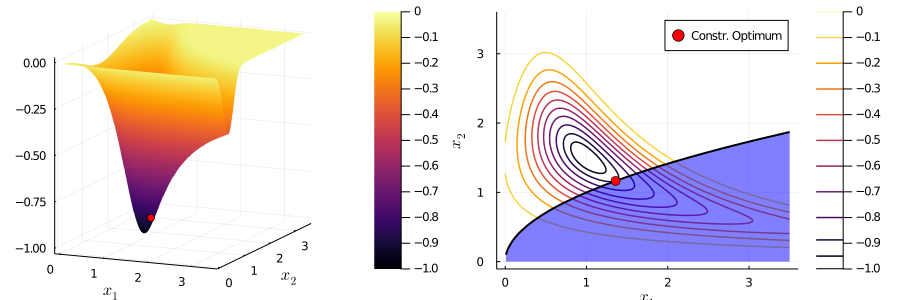

In [1]:
using Plots
using LaTeXStrings

x=0:0.01:3.5
f0(x1,x2) = -exp.(-(x1.*x2 - 3/2).^2 - (x2-3/2).^2)
c(z) = sqrt(z)

p1 = surface(x,x,(x,y)->f0(x,y),xlab = L"x_1", ylab = L"x_2")
scatter3d!(p1,[1.358],[1.165],[f0(1.358,1.165)],markercolor=:red,leg=false)
p2 = contour(x,x,(x,y)->f0(x,y),lw=1.5,levels=[collect(0:-0.1:-0.85)...,-0.887,-0.95,-1],xlab = L"x_1", ylab = L"x_2")
plot!(p2,c,0.01,3.5,label="",lw=2,color=:black,fill=(0,0.5,:blue))
scatter!(p2,[1.358],[1.165],markersize=5,markercolor=:red,label="Constr. Optimum")
plot(p1,p2,size=(900,300))

In [24]:
* If we had multiple constraints ($l$), we'd just add them up to get

$$
\mathcal{L}(\mathbf{x},\mathbf{\lambda}) = f(\mathbf{x}) - \sum_{i=1}^l \lambda_i h_i(\mathbf{x})
$$

LoadError: [91msyntax: "*" is not a unary operator[39m

In [8]:
## Inequality Constraints

Suppose now we had

$$
\begin{aligned}
\min_\mathbf{x} & f(\mathbf{x}) \\
\text{subject to } & g(\mathbf{x}) \leq 0
\end{aligned}
$$

which, if the solution lies *on* the constraint *boundary*, means that

$$
\nabla f - \mu \nabla g = 0
$$

for some scalar $\mu$ - as before. 

* In this case, we say the **constraint is active**.
* In the opposite case, i.e. the solution lies **inside** the contrained region, we way the contraint is **inactive**. 
* In that case, we are back to an *unconstrained* problem, look for $\nabla f = 0$, and set $\mu=0$.



LoadError: [91msyntax: extra token "now" after end of expression[39m

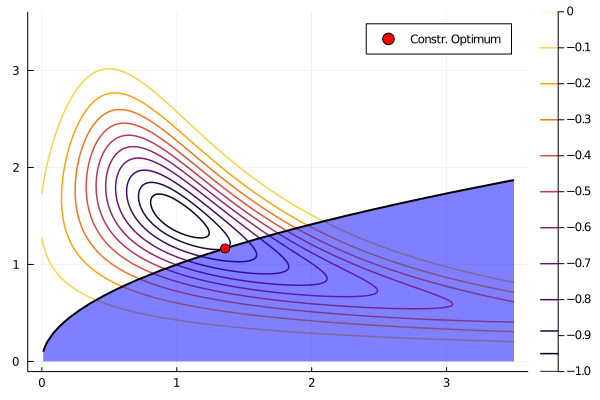

In [17]:
# the blue area shows the FEASIBLE SET
contour(x,x,(x,y)->f0(x,y),lw=1.5,levels=[collect(0:-0.1:-0.85)...,-0.887,-0.95,-1])
plot!(c,0.01,3.5,label="",lw=2,color=:black,fill=(0,0.5,:blue))
scatter!([1.358],[1.165],markersize=5,markercolor=:red,label="Constr. Optimum")

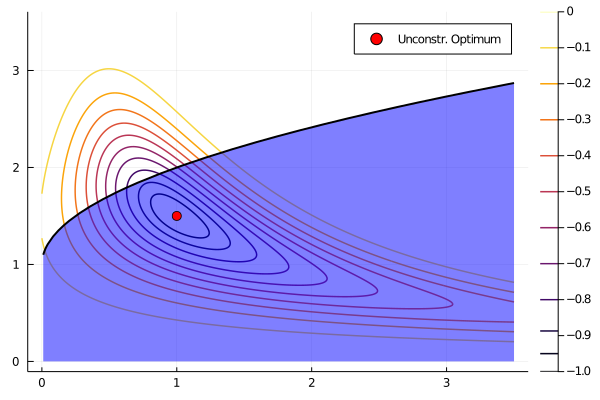

In [18]:
# the blue area shows the FEASIBLE SET
# NOW THE CONSTRAINT IS INACTIVE OR SLACK!
c2(x1) = 1+sqrt(x1)
contour(x,x,(x,y)->f0(x,y),lw=1.5,levels=[collect(0:-0.1:-0.85)...,-0.887,-0.95,-1])
plot!(c2,0.01,3.5,label="",lw=2,color=:black,fill=(0,0.5,:blue))
scatter!([1],[1.5],markersize=5,markercolor=:red,label="Unconstr. Optimum")

## Infinity Step

* We could do an **infinite step** to avoid *infeasible points*:

$$
\begin{aligned}
f_{\infty\text{-step}} &= \begin{cases}
f(\mathbf{x}) & \text{if } g(\mathbf{x}) \leq 0 \\
\infty & \text{else. } 
\end{cases}\\
 &= f(\mathbf{x}) + \infty (g(\mathbf{x} > 0)
\end{aligned}
$$

* Unfortunately, this is discontinous and non-differentiable, i.e. hard to handle for algorithms.
* Instead, we use a *linear penalty* $\mu g(\mathbf{x})$ on the objective if the constraint is violated.


* The penalty provides a lower bound to $\infty$:

$$
\mathcal{L}(\mathbf{x},\mu) = f(\mathbf{x}) + \mu g(\mathbf{x})
$$

* We can get back the infinite step by maximizing the penalty:

$$
f_{\infty\text{-step}} = \max_{\mu\geq 0} \mathcal{L}(\mathbf{x},\mu)
$$

* Every infeasible $\mathbf{x}$ returns $\infty$, all others return $f(\mathbf{x})$

## Kuhn-Karush-Tucker (KKT)

* Our problem thus becomes

$$
\min_\mathbf{x} \max_{\mu\geq 0} \mathcal{L}(\mathbf{x},\mu)
$$

* This is called the **primal problem**. Optimizing this requires:


1. $g(\mathbf{x}^*) \leq 0$. Point is feasible.
2. $\mu \geq 0$. Penalty goes into the right direction. *Dual feasibility*.
3. $\mu g(\mathbf{x}^*) = 0$. Feasible point on the boundary has $g(\mathbf{x}) = 0$, otherwise $g(\mathbf{x}) < 0$ and $\mu =0$.
4. $\nabla f(\mathbf{x}^*) - \mu \nabla g(\mathbf{x}^*) = 0$. With an active constraint, we want parallel contours of objective and constraint. When inactive, our optimum just has $\nabla f(\mathbf{x}^*) = 0$, which means $\mu = 0$.


The preceding four conditions are called the Kuhn-Karush-Tucker (KKT) conditions. In the above order, and in general terms, they are:

1. Feasibility
2. Dual Feasibility
3. Complementary Slackness
4. Stationarity.

The KKT conditions are the FONCs for problems with smooth constraints.

## Duality

We can combine equality and inequality constraints:

$$
\mathcal{L}(\mathbf{x},\mathbf{\lambda},\mathbf{\mu}) = f(\mathbf{x}) + \sum_{i} \lambda_i h_i(\mathbf{x}) + \sum_j \mu_j g_j(\mathbf{x})
$$

where, notice, we reverted the sign of $\lambda$ since this is unrestricted.




* The Primal problem is identical to the original problem and just as difficult to solve:

$$
\min_\mathbf{x} \max_{\mathbf{\mu}\geq 0,\mathbf{\lambda}} \mathcal{L}(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})
$$

* The Dual problem reverses min and max:

$$
\max_{\mathbf{\mu}\geq 0,\mathbf{\lambda}} \min_\mathbf{x}  \mathcal{L}(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})
$$


### Dual Values

* The *max-min-inequality* states that for any function $f(a,b)$

$$
\max_\mathbf{a} \min_\mathbf{b} f(\mathbf{a},\mathbf{b}) \leq \min_\mathbf{b} \max_\mathbf{a} f(\mathbf{a},\mathbf{b}) 
$$

* Hence, the solution to the dual is a lower bound to the solution of the primal problem.
* The solution to the *dual function*, $\min_\mathbf{x}  \mathcal{L}(\mathbf{x},\mathbf{\mu},\mathbf{\lambda})$ is the min of a collection of linear functions, and thus always concave.
* It is easy to optimize this.
* In general, solving the dual is easy whenever minimizing $\mathcal{L}$ wrt $x$ is easy.

## Penalty Methods

* We can convert the constrained problem back to unconstrained by adding penalty terms for constraint violoations.
* A simple method could just count the number of violations:

$$
p_\text{count}(\mathbf{x}) = \sum_{i} (h_i(\mathbf{x}) \neq 0 ) + \sum_j  (g_j(\mathbf{x} > 0)
$$

* and add this to the objective in an *unconstrained* problem with penalty $\rho > 0$

$$
\min_\mathbf{x} f(\mathbf{x}) + \rho p_\text{count}(\mathbf{x})
$$

* One can choose the penalty function: for example, a quadratic penaly will produce a smooth objective function
* Notice that $\rho$ needs to become very large sometimes here.

## Augmented Lagrange Method

* This is very similar, but specific to equality constraints.

## Interior Point Method

* Also called *barrier method*.
* These methods make sure that the search point remains always feasible.
* As one approaches the constraint boundary, the barrier function goes to infinity. Properties:

1. $p_\text{barrier}(\mathbf{x})$ is continuous
2. $p_\text{barrier}(\mathbf{x})$ is non negative
3. $p_\text{barrier}(\mathbf{x})$ goes to infinitey as one approaches the constraint boundary

### Barriers

* Inverse Barrier

$$
p_\text{barrier}(\mathbf{x}) = -\sum_i \frac{1}{g_i(\mathbf{x})}
$$

* Log Barrier

$$
p_\text{barrier}(\mathbf{x}) = -\sum_i \begin{cases}\log(-g_i(\mathbf{x})) & \text{if } g_i(\mathbf{x}) \geq -1 \\
0& \text{else.} 
\end{cases}
$$

* The approach is as before, one transforms the problem to an unconstrained one and increases $\rho$ until convergence:

$$
\min_\mathbf{x} f(\mathbf{x}) + \frac{1}{\rho} p_\text{barrier}(\mathbf{x})
$$


### Examples

$$ 
\min_{x \in \mathbb{R}^2} \sqrt{x_2} \text{ subject to }\begin{array}{c} \\
 x_2 \geq 0 \\
 x_2 \geq (a_1 x_1 + b_1)^3 \\
x_2 \geq (a_2 x_1 + b_2)^3 
\end{array}
$$



## Constrained Optimisation with [`NLopt.jl`](https://github.com/JuliaOpt/NLopt.jl)

* We need to specify one function for each objective and constraint.
* Both of those functions need to compute the function value (i.e. objective or constraint) *and* it's respective gradient. 
* `NLopt` expects contraints **always** to be formulated in the format 
	$$ g(x) \leq 0 $$
     where $g$ is your constraint function
* The constraint function is formulated for each constraint at $x$. it returns a number (the value of the constraint at $x$), and it fills out the gradient vector, which is the partial derivative of the current constraint wrt $x$.
* There is also the option to have vector valued constraints, see the documentation.
* We set this up as follows:

In [30]:
using NLopt

count = 0 # keep track of # function evaluations

function myfunc(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = 0
        grad[2] = 0.5/sqrt(x[2])
    end

    global count
    count::Int += 1
    println("f_$count($x)")

    sqrt(x[2])
end



┌ Info: Precompiling NLopt [76087f3c-5699-56af-9a33-bf431cd00edd]
└ @ Base loading.jl:1278


myfunc (generic function with 1 method)

In [31]:
function myconstraint(x::Vector, grad::Vector, a, b)
    if length(grad) > 0
        grad[1] = 3a * (a*x[1] + b)^2
        grad[2] = -1
    end
    (a*x[1] + b)^3 - x[2]
end

opt = Opt(:LD_MMA, 2)
lower_bounds!(opt, [-Inf, 0.])
xtol_rel!(opt,1e-4)

min_objective!(opt, myfunc)
inequality_constraint!(opt, (x,g) -> myconstraint(x,g,2,0), 1e-8)
inequality_constraint!(opt, (x,g) -> myconstraint(x,g,-1,1), 1e-8)

(minfunc,minx,ret) = NLopt.optimize(opt, [1.234, 5.678])
println("got $minfunc at $minx after $count iterations returned $ret)")

f_1([1.234, 5.678])
f_2([0.8787394664016357, 5.551370325142423])
f_3([0.8262160034228196, 5.043903787432386])
f_4([0.4739440370386794, 4.0767726724255375])
f_5([0.35389779634506047, 3.0308503583016])
f_6([0.33387310647853335, 1.9717933962872487])
f_7([0.3333337209575201, 1.0450874902862517])
f_8([0.33333357431034494, 0.4695027039311135])
f_9([0.3333332772332185, 0.3057923933552822])
f_10([0.33333339455750244, 0.2963215980646768])
f_11([0.3333333342139688, 0.29629628951338166])
got 0.5443310477213124 at [0.3333333342139688, 0.29629628951338166] after 11 iterations returned XTOL_REACHED)


## NLopt: Rosenbrock

* Let's tackle the rosenbrock example again.
* To make it more interesting, let's add an inequality constraint.
	$$ \min_{x\in \mathbb{R}^2} (1-x_1)^2  + 100(x_2-x_1^2)^2  \text{  subject to  } 0.8 - x_1^2 -x_2^2 \geq 0 $$
* in `NLopt` format, the constraint is $x_1^2 + x_2^2 - 0.8 \leq 0$

In [32]:
function rosenbrockf(x::Vector,grad::Vector)
    if length(grad) > 0
        grad[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
        grad[2] = 200.0 * (x[2] - x[1]^2)
    end
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

rosenbrockf (generic function with 1 method)

In [33]:
function r_constraint(x::Vector, grad::Vector)
    if length(grad) > 0
	grad[1] = 2*x[1]
	grad[2] = 2*x[2]
	end
	return x[1]^2 + x[2]^2 - 0.8
end

r_constraint (generic function with 1 method)

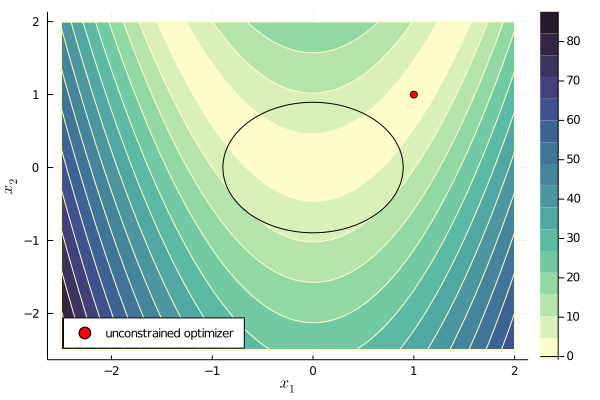

In [34]:
grad = zeros(2)
xrange = collect(-2.5:0.01:2)
cc = contour(xrange,xrange, (x,y)->sqrt(rosenbrockf([x, y],grad)), fill=true, color=:deep, ylab = L"x_2",xlab = L"x_1", leg = :bottomleft)
contour!(cc,xrange,xrange,(x,y)->r_constraint([x, y],grad), levels = [0])
scatter!(cc,[1],[1],color = :red, lab = "unconstrained optimizer")

In [35]:
# let's compute the constrained optimizer now!
opt = Opt(:LD_MMA, 2)
lower_bounds!(opt, [-5, -5.0])
min_objective!(opt,(x,g) -> rosenbrockf(x,g))
inequality_constraint!(opt, (x,g) -> r_constraint(x,g))
ftol_rel!(opt,1e-9)
(minfunc,minx,ret) = NLopt.optimize(opt, [-1.0,0.0])

(0.07588358473630112, [0.7247018361820217, 0.5242206107649053], :FTOL_REACHED)

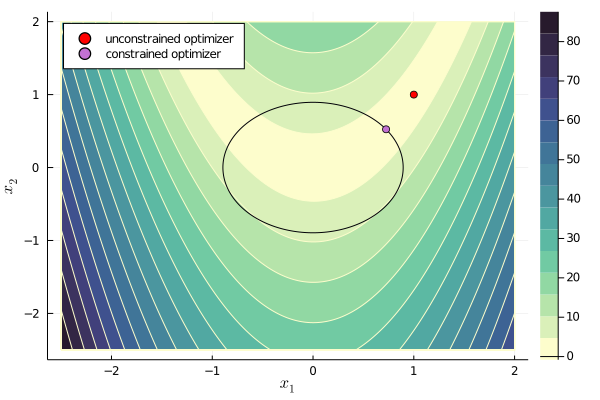

In [36]:
scatter!(cc, [minx[1]], [minx[2]], label = "constrained optimizer", leg = :topleft)

In [43]:
using Interact

In [40]:
function r_constraint(x::Vector, grad::Vector,radius::Number)
    if length(grad) > 0
	grad[1] = 2*x[1]
	grad[2] = 2*x[2]
	end
	return x[1]^2 + x[2]^2 - radius
end

function nlopt_interact(radius)
   opt = Opt(:LD_MMA, 2)
    lower_bounds!(opt, [-5, -5.0])
    min_objective!(opt,(x,g) -> rosenbrockf(x,g))
    inequality_constraint!(opt, (x,g) -> r_constraint(x,g,radius))
    ftol_rel!(opt,1e-9)
    NLopt.optimize(opt, [-1.0,0.0]) 
end


nlopt_interact (generic function with 1 method)

In [46]:
using WebIO
# WebIO.install_jupyter_nbextension()

@manipulate for radius in slider(0.5:0.01:4.0, value = 0.6) |> onchange
    (minfunc,minx,ret) = nlopt_interact(radius)
    cc = contour(xrange,xrange, (x,y)->sqrt(rosenbrockf([x, y],grad)), fill=true, color=:deep, ylab = L"x_2",xlab = L"x_1", leg = :bottomleft, ratio = 1)
    contour!(cc,xrange,xrange,(x,y)->r_constraint([x, y],grad,radius), levels = [0])
    scatter!(cc,[1],[1],color = :red, lab = "unconstrained optimizer")
    scatter!(cc, [minx[1]], [minx[2]], label = "constrained optimizer", leg = :topleft)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 351,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\William\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\William\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\William\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\William\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\William\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000014ae5150, Task (runnable) @0x0000000014ae5150), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.5\",\"0.51\",\"0.52\",\"0.53\",\"0.54\",\"0.55\",\"0.56\",\"0.57\",\"0.58\",\"0.59\",\"0.6\",\"0.61\",\"0.62\",\"0.63\",\"0.64\",\"0.65\",\"0.66\",\"0.67\",\"0.68\",\"0.69

## JuMP.jl

* Introduce [`JuMP.jl`](https://jump.dev/)
* JuMP is a mathematical programming interface for Julia. It is like AMPL, but for free and with a decent programming language.
* The main highlights are:
	* It uses automatic differentiation to compute derivatives from your expression.
	* It supplies this information, as well as the sparsity structure of the Hessian to your preferred solver.
	* It decouples your problem completely from the type of solver you are using. This is great, since you don't have to worry about different solvers having different interfaces.
	* In order to achieve this, `JuMP` uses [`MathProgBase.jl`](https://github.com/JuliaOpt/MathProgBase.jl), which converts your problem formulation into a standard representation of an optimization problem.
* Let's look at the readme
* The technical citation is Lubin et al <cite data-cite=JuMP></cite>



## JuMP: Quick start guide

* this is form the [quick start guide](https://jump.dev/JuMP.jl/stable/quickstart/#Quick-Start-Guide)
* please check the docs, they are excellent.

### Step 1: create a model

* A model collects variables, objective function and constraints.
* it defines a specific solver to be used.
* JuMP makes it very easy to [swap out solver backends](http://www.juliaopt.org/JuMP.jl/dev/installation/) - This is very valuable!

In [ ]:
using JuMP
using GLPK
model = Model(with_optimizer(GLPK.Optimizer))
@variable(model, 0 <= x <= 2)
@variable(model, 0 <= y <= 30)
# next, we set an objective function
@objective(model, Max, 5x + 3 * y)

# maybe add a constraint called "con"?
@constraint(model, con, 1x + 5y <= 3);


* At this stage `JuMP` has a mathematical representation of our model internalized
* The `MathProgBase` machinery knows now exactly how to translate that to different solver interfaces
* For us the only thing left: hit the button!

In [ ]:
JuMP.optimize!(model)

# look at status
termination_status(model)

In [ ]:
# we query objective value and solutions
@show objective_value(model)
@show value(x)
@show value(y)

# as well as the value of the dual variable on the constraint
@show dual(con);

* The last call gets the *dual value associated with a constraint*
* Economists most of the time call that the *value of the lagrange multiplier*. 

> For linear programs, a feasible dual on a `>=` constraint is nonnegative and a feasible dual on a `<=` constraint is nonpositive

* This is different to some textbooks and has nothing to do with wether max or minimizing.

In [ ]:
# helpfully, we have this, which is always positive:
shadow_price(con)

## JuMP handles...

* linear programming
* mixed-integer programming
* second-order conic programming
* semidefinite programming, and 
* nonlinear programming


In [ ]:
# JuMP: nonlinear Rosenbrock Example
# Instead of hand-coding first and second derivatives, you only have to give `JuMP` expressions for objective and constraints.
# Here is an example.

using Ipopt

let

    m = Model(with_optimizer(Ipopt.Optimizer))

    @variable(m, x)
    @variable(m, y)

    @NLobjective(m, Min, (1-x)^2 + 100(y-x^2)^2)

    JuMP.optimize!(m)
    @show value(x)
    @show value(y)
    @show termination_status(m)

end

In [ ]:
# not bad, right?
# adding the constraint from before:

let
    
    m = Model(with_optimizer(Ipopt.Optimizer))

    @variable(m, x)
    @variable(m, y)

    @NLobjective(m, Min, (1-x)^2 + 100(y-x^2)^2)


    @NLconstraint(m,x^2 + y^2 <= 0.8)

    JuMP.optimize!(m)
    @show value(x)
    @show value(y)
    @show termination_status(m)

end

## JuMP: Maximium Likelihood

* Let's redo the maximum likelihood example in JuMP.
* Let $\mu,\sigma^2$ be the unknown mean and variance of a random sample generated from the normal distribution.
* Find the maximum likelihood estimator for those parameters!
* density:

$$ f(x_i|\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) 
$$


* Likelihood Function

$$
\begin{aligned} 
L(\mu,\sigma^2) = \Pi_{i=1}^N f(x_i|\mu,\sigma^2) =& \frac{1}{(\sigma \sqrt{2\pi})^n} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^N (x_i-\mu)^2 \right) \\
	 =& \left(\sigma^2 2\pi\right)^{-\frac{n}{2}} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^N (x_i-\mu)^2 \right) 
\end{aligned} 
$$

* Constraints: $\mu\in \mathbb{R},\sigma>0$
* log-likelihood: 

$$ \log L = l = -\frac{n}{2} \log \left( 2\pi \sigma^2 \right) - \frac{1}{2\sigma^2} \sum_{i=1}^N (x_i-\mu)^2 $$


In [ ]:
#  Copyright 2015, Iain Dunning, Joey Huchette, Miles Lubin, and contributors
#  example modified 
using Distributions

let
    distrib = Normal(4.5,3.5)
    n = 10000
    
    data = rand(distrib,n);
    
    m = Model(with_optimizer(Ipopt.Optimizer))
    set_optimizer_attribute(m, MOI.Silent(), true)

    @variable(m, mu, start = 0.0)
    @variable(m, sigma >= 0.0, start = 1.0)
    
    @NLobjective(m, Max, -(n/2)*log(2π*sigma^2)-sum((data[i] - mu) ^ 2 for i = 1:n)/(2*sigma^2))
    
    JuMP.optimize!(m)
    @show termination_status(m)
    println("μ = ", value(mu),", mean(data) = ", mean(data))
    println("σ^2 = ", value(sigma)^2, ", var(data) = ", var(data))
end

# Linear Constrained Problems (LPs)

* Very similar to before, just that both objective and constraints are *linear*.

$$
\begin{aligned}
\min_\mathbf{x} & \mathbf{c}^T \mathbf{x}\\
\text{subject to } & \mathbf{w}_{LE}^{(i)T} \mathbf{x} \leq b_i \text{ for  }i\in{1,2,3,\dots}\\
& \mathbf{w}_{GE}^{(j)T} \mathbf{x} \geq b_j \text{ for  }j\in{1,2,3,\dots}\\
 & \mathbf{w}_{EQ}^{(k)T} \mathbf{x} = b_k \text{ for  }k\in{1,2,3,\dots}\\
\end{aligned}
$$

* Our initial JuMP example was of that sort.

### Standard Form

* Usually LPs are given in *standard form*
* All constraints are less-than inequalities
* All choice variables are non-negative.

$$
\begin{aligned}
\min_\mathbf{x}    & \mathbf{c}^T \mathbf{x}\\
\text{subject to } & \mathbf{A}\mathbf{x} \leq b\\
                   & \mathbf{x}\geq 0
\end{aligned}
$$

* Greater-than inequality constraints are inverted
* equality constraints are split into two
* $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$ and we constrain both components to be positive.


### Equality Form

$$
\begin{aligned}
\min_\mathbf{x}    & \mathbf{c}^T \mathbf{x}\\
\text{subject to } & \mathbf{A}\mathbf{x} = b\\
                   & \mathbf{x}\geq 0
\end{aligned}
$$

* Can transform standard into equality form 

$$
\mathbf{A}\mathbf{x} \leq b \to \mathbf{A}\mathbf{x} + \mathbf{s}= b ,\mathbf{s}\geq 0
$$

* equality constraints are split into two
* $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$ and we constrain both components to be positive.



### Solving LPs

* Simplex Algorithm operates on Equality Form
* Moving from one vertex to the next of the feasible set, this is guaranteed to find the optimal solution if the problem is bounded.


## A Cannery Problem

* A can factory (a cannery) has plants in Seattle and San Diego
* They need to decide how to serve markets New-York, Chicago, Topeka
* Firm wants to 
    1. minimize shipping costs
    2. shipments cannot exceed capacity
    3. shipments must satisfy demand
* Formalize that!
* Plant capacity $cap_i$, demands $d_j$ and transport costs from plant $i$ to market  $j$, $dist_{i,j} c$ are all given.
* Let $\mathbf{x}$ be a matrix with element $x_{i,j}$ for number of cans shipped from $i$ to $j$.



## From Maths ...

$$
\begin{aligned}
\min_\mathbf{x}    & \sum_{i=1}^2 \sum_{j=1}^3 dist_{i,j}c \times x_{i,j}\\
\text{subject to } & \sum_{j=1}^3 x(i,j) \leq cap_i , \forall i \\
                   & \sum_{i=1}^2 x(i,j) \geq d_j , \forall j 
\end{aligned}
$$



In [ ]:
# ... to JuMP
# https://github.com/JuliaOpt/JuMP.jl/blob/release-0.19/examples/cannery.jl
#  Copyright 2017, Iain Dunning, Joey Huchette, Miles Lubin, and contributors
#  This Source Code Form is subject to the terms of the Mozilla Public
#  License, v. 2.0. If a copy of the MPL was not distributed with this
#  file, You can obtain one at http://mozilla.org/MPL/2.0/.
#############################################################################
# JuMP
# An algebraic modeling language for Julia
# See http://github.com/JuliaOpt/JuMP.jl
#############################################################################

using JuMP, GLPK, Test
# const MOI = JuMP.MathOptInterface

"""
    example_cannery(; verbose = true)
JuMP implementation of the cannery problem from Dantzig, Linear Programming and
Extensions, Princeton University Press, Princeton, NJ, 1963.
Author: Louis Luangkesorn
Date: January 30, 2015
"""
function example_cannery(; verbose = true)
    plants = ["Seattle", "San-Diego"]
    markets = ["New-York", "Chicago", "Topeka"]

    # Capacity and demand in cases.
    capacity = [350, 600]
    demand = [300, 300, 300]

    # Distance in thousand miles.
    distance = [2.5 1.7 1.8; 2.5 1.8 1.4]

    # Cost per case per thousand miles.
    freight = 90

    num_plants = length(plants)
    num_markets = length(markets)

    cannery = Model(with_optimizer(GLPK.Optimizer))

    @variable(cannery, ship[1:num_plants, 1:num_markets] >= 0)

    # Ship no more than plant capacity
    @constraint(cannery, capacity_con[i in 1:num_plants],
        sum(ship[i,j] for j in 1:num_markets) <= capacity[i]
    )

    # Ship at least market demand
    @constraint(cannery, demand_con[j in 1:num_markets],
        sum(ship[i,j] for i in 1:num_plants) >= demand[j]
    )

    # Minimize transporatation cost
    @objective(cannery, Min, sum(distance[i, j] * freight * ship[i, j]
        for i in 1:num_plants, j in 1:num_markets)
    )

    JuMP.optimize!(cannery)

    if verbose
        println("RESULTS:")
        for i in 1:num_plants
            for j in 1:num_markets
                println("  $(plants[i]) $(markets[j]) = $(JuMP.value(ship[i, j]))")
            end
        end
    end

    @test JuMP.termination_status(cannery) == MOI.OPTIMAL
    @test JuMP.primal_status(cannery) == MOI.FEASIBLE_POINT
    @test JuMP.objective_value(cannery) == 151200.0
end
example_cannery()

# Discrete Optimization / Integer Programming

* Here the choice variable is contrained to come from a discrete set $\mathcal{X}$. 
* If this set is $\mathcal{X} = \mathbb{N}$, we have an **integer program**
* If only *some* $x$ have to be discrete, this is a **mixed integer program**

## Example

$$
\begin{aligned}
\min_\mathbf{x}    & x_1 + x_2\\
\text{subject to } & ||\mathbf{x}|| \leq 2\\
                   & \mathbf{x} \in \mathbb{N}
\end{aligned}
$$

* continuous optimum is $(-\sqrt{2},-\sqrt{2})$ and objective is $y=-2\sqrt{2}=-2.828$
* Integer constrained problem is only delivering $y=-2$, and $\mathbf{x}^*\in {(-2,0),(-1,-1),(0,-2)}$

In [ ]:
x = -3:0.01:3
dx = repeat(range(-3,stop = 3, length = 7),1,7)
contourf(x,x,(x,y)->x+y,color=:blues)
scatter!(dx,dx',legend=false,markercolor=:white)
plot!(x->sqrt(4-x^2),-2,2,c=:white)
plot!(x->-sqrt(4-x^2),-2,2,c=:white)
scatter!([-2,-1,0],[0,-1,-2],c=:red)
scatter!([-sqrt(2)],[-sqrt(2)],c=:red,markershape=:cross,markersize=9)

## Rounding

* One solution is to just *round the continuous solution to the nearest integer*
* We compute the **relaxed** problem, i.e. the one where $x$ is continuous.
* Then we round up or down.
* Can go terribly wrong.

## Cutting Planes

* This is an exact method
* We solve the relaxed problem first.
* Then we add linear constraints that result in the solution becoming integral.

## Branch and Bound

* This enumerates all possible soultions.
* Branch and bound does this, without having to compute all of them.

## Example: The Knapsack Problem

* We are packing our knapsack for a trip but only have space for the most valuable items.
* We have $x_i=0$ if item $i$ is not in the sack, 1 else.

$$
\begin{aligned}
\min_x & - \sum_{i=1}^n v_i x_i \\
\text{s.t. } & \sum_{i=1}^n w_i x_i \leq w_{max} \\
w_i \in \mathbb{N}_+,  & v_i \in \mathbb{R}
\end{aligned}
$$

* If ther are $n$ items, we have $2^n$ possible design vectors.
* But there is a useful recursive relationship.
* If we solved $n-1$ knapsack problems so far and deliberate about item $n$
    * If it's not worth including item $n$, then the solution **is** the knapsack problem for $n-1$ items and capacity $w_{\max}$
    * If it IS worth including it: solution will have value of knapsack with $n-1$ items and reduced capacity, plus the value of the new item
* This **is** dynamic progamming.

### Knacksack Recursion

* In particular, the recursion looks like this:

$$
\text{knapsack}\left(i,w_{\text{max}}\right)=\begin{cases}
0 & \text{if}i=0\\
\text{knapsack}\left(i-1,w_{\text{max}}\right) & \text{if}w_{i}>w_{\text{max}}\\
\max\begin{cases}
\text{knapsack}\left(i-1,w_{\text{max}}\right) & \text{(discard new item)}\\
\text{knapsack}\left(i-1,w_{\text{max}}-w_{i}\right)+v_{i} & \text{(include new item)}
\end{cases} & \text{else.}
\end{cases}
$$

In [ ]:
#  Copyright 2017, Iain Dunning, Joey Huchette, Miles Lubin, and contributors
#  This Source Code Form is subject to the terms of the Mozilla Public
#  License, v. 2.0. If a copy of the MPL was not distributed with this
#  file, You can obtain one at http://mozilla.org/MPL/2.0/.
#############################################################################
# JuMP
# An algebraic modeling langauge for Julia
# See http://github.com/JuliaOpt/JuMP.jl
#############################################################################
# knapsack.jl
#
# Solves a simple knapsack problem:
# max sum(p_j x_j)
#  st sum(w_j x_j) <= C
#     x binary
#############################################################################

using JuMP, Cbc, LinearAlgebra

let

    # Maximization problem
    m = Model(with_optimizer(Cbc.Optimizer))
    set_optimizer_attribute(m, MOI.Silent(), true)

    
    @variable(m, x[1:5], Bin)
    
    profit = [ 5, 3, 2, 7, 4 ]
    weight = [ 2, 8, 4, 2, 5 ]
    capacity = 10
    
    # Objective: maximize profit
    @objective(m, Max, dot(profit, x))
    
    # Constraint: can carry all
    @constraint(m, dot(weight, x) <= capacity)
    
    # Solve problem using MIP solver
    JuMP.optimize!(m)
    
    println("Objective is: ", JuMP.objective_value(m))
    println("Solution is:")
    for i = 1:5
        print("x[$i] = ", JuMP.value(x[i]))
        println(", p[$i]/w[$i] = ", profit[i]/weight[i])
    end
end